In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
df = pd.read_csv('dash_all_time.csv')
df.head(4)

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-09-2019,71.95,72.36,70.92,71.85,212554942,651170189
1,27-09-2019,69.23,72.20,67.85,71.97,242836100,652131225
2,26-09-2019,73.12,73.63,67.15,69.19,209364896,626812674
3,25-09-2019,72.72,76.17,70.01,73.09,281828717,662008601


In [4]:
print (df.describe())

              Open         High          Low        Close        Volume  \
count  2053.000000  2053.000000  2053.000000  2053.000000  2.053000e+03   
mean    121.043511   126.426402   115.181336   121.049131  7.259904e+07   
std     206.519747   217.680012   193.485706   206.347525  1.123911e+08   
min       0.213899     0.354461     0.213899     0.314865  9.604000e+03   
25%       3.180000     3.400000     3.060000     3.180000  1.365320e+05   
50%      12.050000    12.600000    11.640000    12.060000  1.721090e+06   
75%     156.680000   162.560000   153.480000   156.720000  1.221310e+08   
max    1555.590000  1642.220000  1371.390000  1550.850000  1.019453e+09   

         Market Cap  
count  2.053000e+03  
mean   9.591262e+08  
std    1.617982e+09  
min    1.046628e+06  
25%    1.717093e+07  
50%    8.061941e+07  
75%    1.322222e+09  
max    1.204275e+10  


In [5]:
print (df.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Market Cap      int64
dtype: object


In [6]:
df1 = df[['Date','Close']]
df1.head(4)

,Date,Close
0,28-09-2019,71.85
1,27-09-2019,71.97
2,26-09-2019,69.19
3,25-09-2019,73.09


In [7]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print (df_ts.tail(3))


<class 'pandas.core.frame.DataFrame'>
            Close
Date             
01-01-2015   1.94
01-01-2016   3.38
01-01-2017  11.23
              Close
Date               
31-12-2016    11.21
31-12-2017  1051.68
31-12-2018    79.06


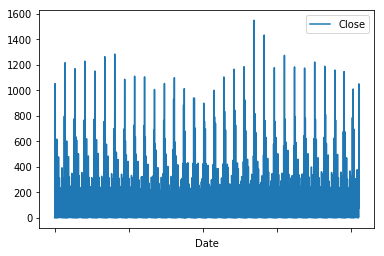

In [8]:
#plot
df_ts.plot()

In [9]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
       
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [10]:
# Stationarity with Dickey Fuller Test 
# Convert the DF to series first
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                -1.021921e+01
p-value                        5.379933e-18
#lags Used                     2.600000e+01
Number of Observations Used    2.026000e+03
Critical Value (1%)           -3.433582e+00
Critical Value (5%)           -2.862968e+00
Critical Value (10%)          -2.567530e+00
dtype: float64


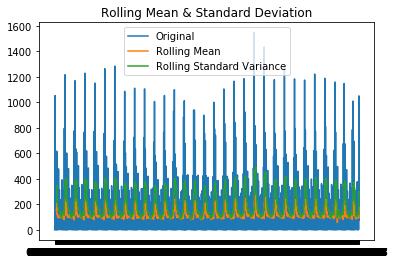

In [11]:
# plot the 12-Month Moving Rolling Mean, Variance 
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)